In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import mc_rtm

# The Monte Carlo Radiative Transfer Model

Written by: Greg Blumberg for Dave Turner's Advanced Radiation Techniques Class 

## Section 1: Background

This model sends photons out one and a time into a layer where the following parameters can be set:
* single scatter albedo $\omega_0$
* layer optical depth $\tau$
* asymmetry parameter $g$ have been specified.
* initial angle of the photon relative to the layer $\Theta_0$

The Multiple simulations can be specified by passing arrays to the model.

This model is wavelength/frequency/wavenumber agnostic and only considers the behavior of the photons.  To make it dependent on these variables, the single scatter albedo $\omega_0$, layer optical depth $\tau$, and asymmetry parameters $g$ must be calculated for a specific wavelength (for example, from Mie Theory, the Rayleigh Approximation, or Ray Tracing).

## Section 2: Model Output

The model outputs a image showing the photon paths.  The photons are colored by what happens to them at the end of their "life".

* Purple &#128995; - photons are scattered out of the top of the layer (Top-of-Atmosphere)
* Green &#128994; - photons pass through the layer without any extinction events (Direct Beam)
* Red &#128308; - photons have been scattered somewhere within the layer (Diffuse Beam)
* Blue &#128309; - photons have been absorbed within the layer (Absorption)

**The size of the photon marker is proportional to the number of times a photon gets scattered.  See the plot legend for an interpretation.  This does not apply to photons in the direct beam, which have green circle with no fill.**

The model also outputs additional metadata about the simulation.  At the end of all the simulations, a Pandas Dataframe is provided showing the respective fraction (or probability) of photon events and the input variables provided.

SIMULATION #: 1
------------------------------------------------------------------


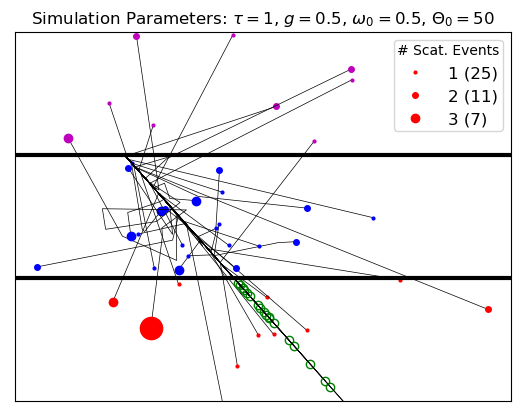

------------------------------------------------------------------
Zenith Angle (θ): 50
Optical Depth (τ): 1
Single Scatter Albedo (ω): 0.5
Asymmetry Parameter (g): 0.5
Beer's Law Transmission (t): 0.2110365734035687
------------------------------------------------------------------
SIMULATION RESULTS:
      Direct Beam   Diffuse Beam     TOA Events     Absorption
             0.21           0.11            0.1           0.58

# Photons w/      No Scat    1 Scat    2 Scat   >3 Scat
                     0.57      0.25      0.11      0.07
------------------------------------------------------------------



In [84]:
# Specify a list of simulations:

g = [.5]
optical_depth = [1]
single_scatter_albedo = [.5]
zenith_angle = [50]

df_cases = mc_rtm.mc_rtm(taus=optical_depth, g=g, ssas=single_scatter_albedo, theta_0s=zenith_angle, num_photons=100)

In [58]:
df_cases

,Zenith Angle,Optical Depth,SSA,g,trans,Direct Beam,Diffuse Beam,TOA Events,Absorption,No Scat,1 Scat,2 Scat,>3 Scat
0,50,1,0.5,0.5,0.211037,0.22,0.18,0.05,0.55,0.61,0.28,0.1,0.01


## Section 3: Model Caveats

For these simulations, there is no emission from the layer to contribute to the direct beam.  We would need to specify temperature of the layer to include those physics and solve for Planck's Law.  If the blackbody emission of the layer of photons is quite small relative to the photons that pass through the layer, then we can ignore the emission of photons by the layer.  You can imagine that these simulations are much like visible radiation passing through the atmosphere, where the initial source of these photons is the sun, and particles within the layer can either contribute to scattering of the incoming solar radiation or absorption of it.

## Section 4: Where is this applied?

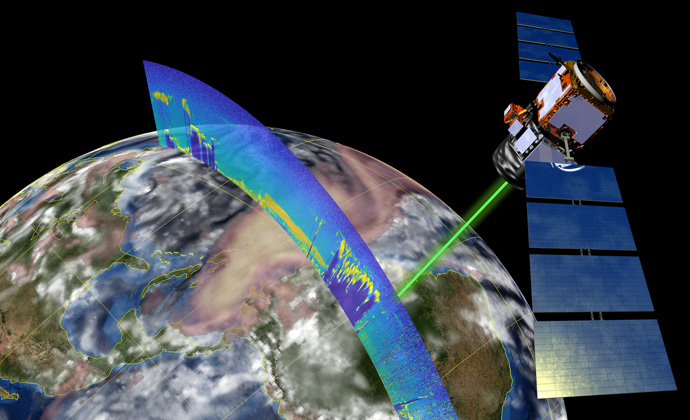

You can imagine a remote sensor above the layer (space-borne) or below the layer (ground-based) counting photons to measure the radiance.  This could be an active sensor like a lidar or a passive sensor like an imager.  These sensors have a particular signal to noise ratio (SNR), which can be thought of as the probability that the instrument detector will be able to measure the photon hitting the sensor.  For example, it could be that the SNR is 50%, in which only 50/100 photons will be counted.

A wider aperature of the sensor will enable more photons to be counted, but will decrease the precision of where these photons will be coming from (lower representitiveness).

## Section 5: Exercises to Improve Your Understanding

Attempt to answer the below questions to test your understanding of this model:

1. Design a MC-RTM simulation where the single-scatter approximation could be applied.  That is, your simulation has a significant number of photons that scatter only once.  Provide the input parameters.  Explain your reasoning.
2. Design a MC-RTM simulation where multiple scattering occurs.  Provide the input parameters.  Explain your reasoning.
3. Explain the effects of varying the layer optical depth $\tau$ from 0.1 to 100 by factors of 2 on the lifetime of photons.
4. Explain the effects of varying the solar zenith angle $\Theta_0$ from 0 to 85 degrees.
5. Determine the effects of setting the single scatter albedo $\omega_0$ to 1.0, 0.9999, 0.999, 0.99, and 0.9.
6. Determine the effects of varying the asymmetry parameter $g$ from 0.0 to 1.0.
7. Design an experiment where scattering occurs often, but the emission of the layer would still be important to include.
8. What modifications do you need to make to the parameters of this model to increase its computational time?  Why?